In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('./data/housing.csv', header=None, delim_whitespace=True)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [19]:
y = df.values[:, 13]
x = df.values[:, :13]

In [24]:
y # continuous data => regression

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [26]:
x_train.shape

(379, 13)

In [58]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # regresion에서는 output layer에 activation function을 사용하지 않는다.

# binary cls activation: sigmoid()
# multiflassification: sofmax()

In [59]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=20)

Epoch 1/100
16/16 [==============================] - 0s 7ms/step - loss: 82.8001 - val_loss: 83.0428
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 73.1092 - val_loss: 89.4944
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 73.5594 - val_loss: 82.4936
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 66.0410 - val_loss: 68.7990
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 62.9382 - val_loss: 65.3375
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 66.7511 - val_loss: 66.0044
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 60.0379 - val_loss: 65.8358
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 65.3072 - val_loss: 61.0268
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 57.3134 - val_loss: 63.0078
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 55.4931 - val_los

16/16 [==============================] - 0s 2ms/step - loss: 28.7559 - val_loss: 31.8197
Epoch 82/100
16/16 [==============================] - 0s 2ms/step - loss: 28.3877 - val_loss: 35.8674
Epoch 83/100
16/16 [==============================] - 0s 2ms/step - loss: 29.0807 - val_loss: 33.0480
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 28.4116 - val_loss: 39.6424
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 31.0529 - val_loss: 38.5595
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 29.0723 - val_loss: 31.3970
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 28.5526 - val_loss: 33.0576
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 30.8654 - val_loss: 33.9904
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 28.1067 - val_loss: 33.4640
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 33.0052 - val_loss: 3

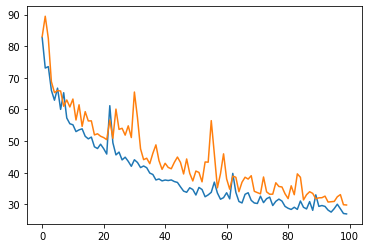

In [61]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [62]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 999us/step - loss: 35.0127


35.012657165527344

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # regresion에서는 output layer에 activation function을 사용하지 않는다.

# binary cls activation: sigmoid()
# multiflassification: sofmax()

In [64]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [65]:
hist = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=20)

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 554.1780 - val_loss: 594.5137
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 537.5939 - val_loss: 574.2147
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 514.7983 - val_loss: 543.4661
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 479.5422 - val_loss: 495.0681
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 425.9589 - val_loss: 425.2091
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 352.0085 - val_loss: 334.8349
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 263.4289 - val_loss: 237.2516
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 181.7769 - val_loss: 164.6213
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 136.4639 - val_loss: 134.7615
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss:

16/16 [==============================] - 0s 2ms/step - loss: 18.9110 - val_loss: 33.2741
Epoch 82/100
16/16 [==============================] - 0s 2ms/step - loss: 18.8367 - val_loss: 33.0502
Epoch 83/100
16/16 [==============================] - 0s 2ms/step - loss: 18.7377 - val_loss: 33.0037
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 18.6812 - val_loss: 32.8391
Epoch 85/100
16/16 [==============================] - 0s 2ms/step - loss: 18.8099 - val_loss: 32.6747
Epoch 86/100
16/16 [==============================] - 0s 2ms/step - loss: 18.6593 - val_loss: 32.5408
Epoch 87/100
16/16 [==============================] - 0s 2ms/step - loss: 18.5478 - val_loss: 32.4700
Epoch 88/100
16/16 [==============================] - 0s 2ms/step - loss: 18.5227 - val_loss: 32.4569
Epoch 89/100
16/16 [==============================] - 0s 2ms/step - loss: 18.5273 - val_loss: 32.3871
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 18.3688 - val_loss: 3

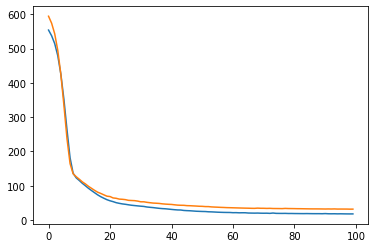

In [66]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [68]:
model.evaluate(x_test_scaled, y_test)

4/4 [==============================] - 0s 998us/step - loss: 19.3952


19.395191192626953

In [70]:
# prediction

In [71]:
preds = model.predict(x_test_scaled)

In [73]:
# evaluation

In [76]:
from sklearn.metrics import r2_score

r2_score(preds, y_test)

0.7339127010371084

In [80]:
for i in range(10):
    pred_price = preds[i]
    real_price = y_test[i]
    print("{} - {}".format(round(real_price), round(pred_price[0])))

25 - 27
30 - 29
31 - 30
20 - 17
48 - 41
22 - 27
35 - 33
16 - 17
23 - 22
10 - 13
